
# Clustering Human Activity using Inertial Sensors Data


## Note:
* Use the next cell to download the data directly, if that didn't work. you can download it manually (available at [UCI archive](https://archive.ics.uci.edu/dataset/240/human+activity+recognition+using+smartphones)) a copy will also be available on Piazza.

* Don't change the part of the code that labels `#Do not change`

* Attach this notebook to your answer sheet with all outputs visible.
* make sure you have  `pytorch, scikit learn, pandas` in your environment


In [4]:

#### Download the dataset

import urllib.request
import zipfile
import os

dataset_url = "https://archive.ics.uci.edu/static/public/240/human+activity+recognition+using+smartphones.zip"
zip_file_path = "Dataset.zip"
extracted_downloaded_folder = "Dataset"
extracted_data_folder = "UCI HAR Dataset"

if not os.path.exists(zip_file_path):
    print("Downloading the dataset...")
    urllib.request.urlretrieve(dataset_url, zip_file_path)

if not os.path.exists(extracted_downloaded_folder):
    print("Extracting the dataset...")
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(".")

if not os.path.exists(extracted_data_folder):
    print("Extracting the dataset...")
    with zipfile.ZipFile(extracted_data_folder +'.zip', 'r') as zip_ref:
        zip_ref.extractall(".")

print("Dataset is ready.")


Extracting the dataset...
Extracting the dataset...
Dataset is ready.


### Load the data into a dataframe


In [5]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Define paths to data files
train_path = "UCI HAR Dataset/train"  # TODO
test_path = "UCI HAR Dataset/test"   # TODO
activity_mapper_path = "UCI HAR Dataset/activity_labels.txt"


# Load training and testing data
X_train = pd.read_csv(f"{train_path}/X_train.txt", delim_whitespace=True, header=None)
y_train = pd.read_csv(f"{train_path}/y_train.txt", delim_whitespace=True, header=None)
X_test, y_test =   pd.read_csv(f"{test_path}/X_test.txt", delim_whitespace=True, header=None), pd.read_csv(f"{test_path}/y_test.txt", delim_whitespace=True, header=None)  # TODO



# Display the first 5 rows of the training dataframe
print("First 5 rows of training feature dataframe:")
X_train.head()  # DO NOT CHANGE


<ipython-input-5-1e64e906fa49>:12: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_train = pd.read_csv(f"{train_path}/X_train.txt", delim_whitespace=True, header=None)
<ipython-input-5-1e64e906fa49>:13: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y_train = pd.read_csv(f"{train_path}/y_train.txt", delim_whitespace=True, header=None)
<ipython-input-5-1e64e906fa49>:14: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_test, y_test =   pd.read_csv(f"{test_path}/X_test.txt", delim_whitespace=True, header=None), pd.read_csv(f"{test_path}/y_test.txt", delim_whitespace=True, header=None)  # TODO


First 5 rows of training feature dataframe:


<ipython-input-5-1e64e906fa49>:14: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  X_test, y_test =   pd.read_csv(f"{test_path}/X_test.txt", delim_whitespace=True, header=None), pd.read_csv(f"{test_path}/y_test.txt", delim_whitespace=True, header=None)  # TODO


,0,1,2,3,4,5,6,7,8,9,...,551,552,553,554,555,556,557,558,559,560
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


#### scaling the data and PCA

In [6]:
from sklearn.preprocessing import StandardScaler
# TODO: Scale X_train
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# TODO: Scale X_test
X_test_scaled = scaler.transform(X_test)

# Convert scaled arrays back to DataFrames
X_train = pd.DataFrame(X_train_scaled)
X_test = pd.DataFrame(X_test_scaled)


# Add 'Activity' column to create training_df and testing_df
# TODO: Combine X_train and y_train into a single DataFrame named training_df.
training_df = pd.concat([X_train, y_train.rename(columns={0: 'Activity'})], axis=1)

# TODO: Combine X_test and y_test into a single DataFrame named testing_df.
testing_df = pd.concat([X_test, y_test.rename(columns={0: 'Activity'})], axis=1)



# Display the first 5 rows of the training feature dataframe
print("First 5 rows of training feature dataframe:")
training_df.head()  # DO NOT CHANGE

First 5 rows of training feature dataframe:


,0,1,2,3,4,5,6,7,8,9,...,552,553,554,555,556,557,558,559,560,Activity
0,0.200642,-0.063683,-0.419628,-0.868814,-0.939441,-0.737529,-0.859817,-0.939019,-0.766437,-0.856036,...,0.025960,-0.276399,-0.360603,0.062940,-0.778427,-0.026080,-0.687219,0.407946,-0.007568,5
1,0.055948,0.031486,-0.253908,-0.875426,-0.923902,-0.849304,-0.868531,-0.921998,-0.848928,-0.871359,...,-0.897357,-0.767990,0.133011,-0.021461,-1.218805,1.484470,-0.694138,0.409117,0.007875,5
2,0.073515,-0.043416,-0.076295,-0.869039,-0.907760,-0.893785,-0.863137,-0.898854,-0.896701,-0.863323,...,-0.260878,-0.438316,-0.377840,0.391976,0.151207,1.704201,-0.702239,0.410288,0.026502,5
3,0.066696,-0.208422,-0.249712,-0.870626,-0.940022,-0.921805,-0.864503,-0.938124,-0.925279,-0.863323,...,0.591045,0.463155,-0.135025,-0.033637,1.037851,-1.003019,-0.701684,0.414650,0.031714,5
4,0.030469,0.027587,-0.109848,-0.875188,-0.934878,-0.921343,-0.867384,-0.931789,-0.928028,-0.870260,...,-0.138515,-0.240313,0.340406,0.268486,1.125918,-1.276282,-0.700152,0.425463,0.045225,5


In [7]:
# TODO perform PCA on the train data and get the first 2 PC
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)  #TODO


#### Visualize the data

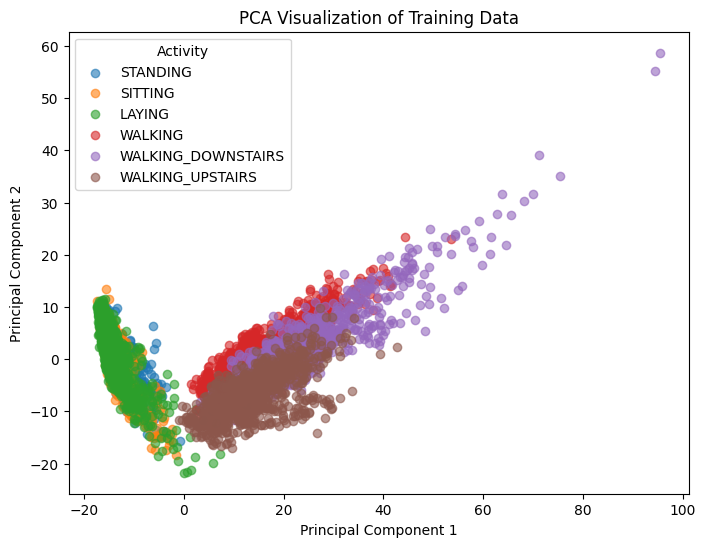

In [8]:
# Visualize training data using PCA

# Use the feature decoder to create Activity Name column

# Load activity labels
activity_labels = pd.read_csv(activity_mapper_path, header=None, sep='\s+', names=['id', 'activity_name'])

# Create mapping dictionary {1: "WALKING", 2: "WALKING_UPSTAIRS", ...}
activity_mapping = dict(zip(activity_labels['id'], activity_labels['activity_name']))

# Use the mapping to decode the Activities labels
Activity_Name = y_train[0].map(activity_mapping)

# Create a scatter plot using the X_train_pca and the Activity Names
plt.figure(figsize=(8, 6))
for activity in Activity_Name.unique():
    indices = Activity_Name == activity
    plt.scatter(X_train_pca[indices, 0], X_train_pca[indices, 1], label=activity, alpha=0.6)


# TODO <--code below-->
plt.title('PCA Visualization of Training Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Activity')
plt.show()


## Kmeans Clustering and The Optimal Number of Clusters

#### 1.  **Elbow Method**

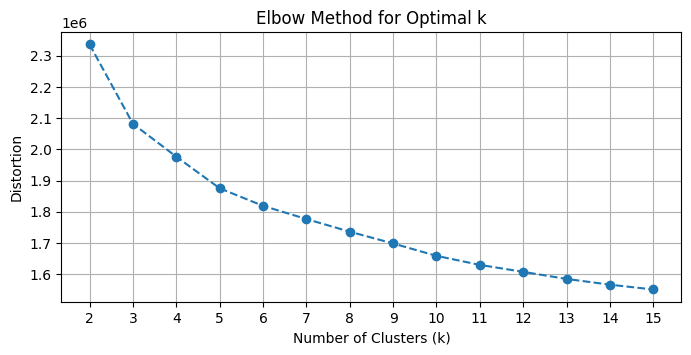

In [9]:
from sklearn.cluster import KMeans

# Elbow Method

distortion_values = []
for k in range(2, 16):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_train_scaled)
    distortion_values.append(kmeans.inertia_)

# Plotting the Elbow Method
plt.figure(figsize=(8, 3.5))
plt.plot(range(2, 16), distortion_values, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Distortion')
plt.xticks(range(2, 16))
plt.grid()
plt.show()

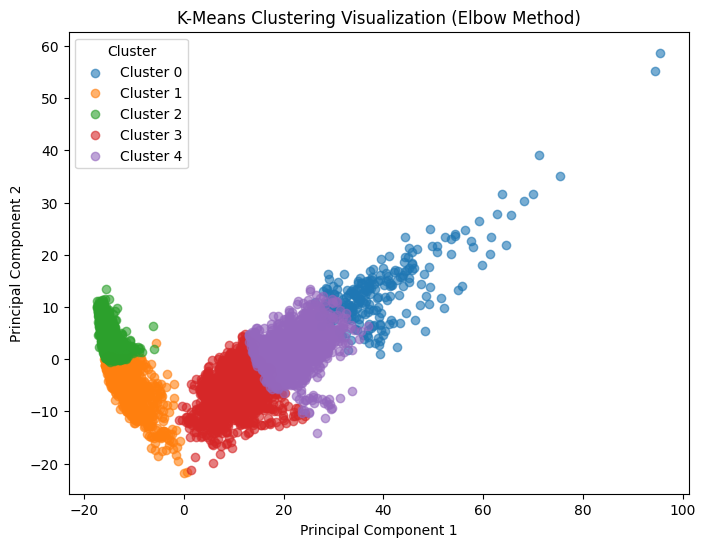

In [10]:
# Choose k based on the elbow method
elbow_k = 5
kmeans_elbow = KMeans(n_clusters=elbow_k, random_state=42, n_init=10)
clusters_elbow = kmeans_elbow.fit_predict(X_train_scaled)

# PCA for visualization - already computed PCA
X_train_pca_elbow = X_train_pca  

# Plotting the clusters
plt.figure(figsize=(8, 6))
for cluster in range(elbow_k):
    indices = clusters_elbow == cluster
    plt.scatter(X_train_pca_elbow[indices, 0], X_train_pca_elbow[indices, 1], label=f'Cluster {cluster}', alpha=0.6)

plt.title('K-Means Clustering Visualization (Elbow Method)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


## Explain distortion with Increasing K
 - The optimal number of cluser is 5.
 
     - Distortion measures the sum of the squared distance between the  data points and the assigned clustes this means an increase in the clusters leads to the 
    decrease of the the distortion. This is mainly because increaseing clusters allows the centroing to better fit the data which reduces the distance between points 
    and their nearest centroid. However, as K becomes large the distortion the decreasing rate also diminishes  which leads to the elbow point where addding more clustersprovides the diminishing returns in reducing distortion.


#### 2.  Adjusted Rand Index (ARI)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

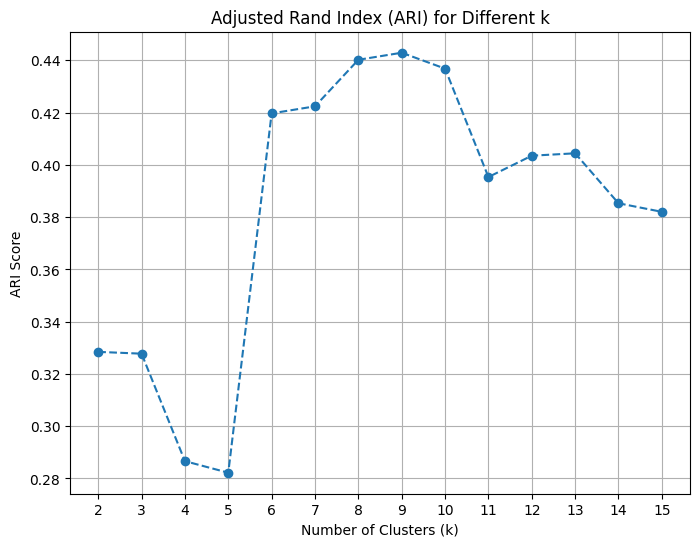

In [11]:
from sklearn.metrics import adjusted_rand_score

# 2. Adjusted Rand Index (ARI)

ari_scores = []
for k in range(2, 16):
    kmeans = KMeans(n_clusters=k, random_state=42)
    clusters = kmeans.fit_predict(X_train_scaled)
    ari = adjusted_rand_score(y_train[0], clusters)
    ari_scores.append(ari)

# Plotting ARI Scores
plt.figure(figsize=(8, 6))
plt.plot(range(2, 16), ari_scores, marker='o', linestyle='--')
plt.title('Adjusted Rand Index (ARI) for Different k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('ARI Score')
plt.xticks(range(2, 16))
plt.grid()
plt.show()


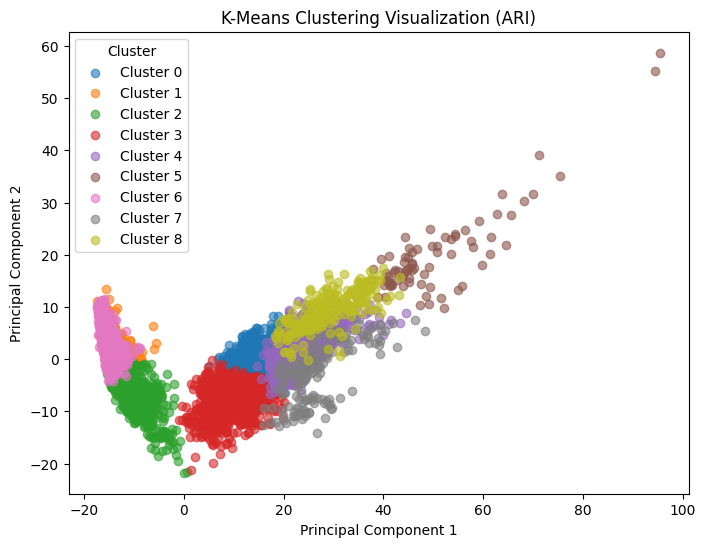

In [12]:
# Choose k based on ARI
best_ari_k = 9  # Based on ARI scores
kmeans_ari = KMeans(n_clusters=best_ari_k, random_state=42, n_init=10)
clusters_ari = kmeans_ari.fit_predict(X_train_scaled)

# PCA for visualization
X_train_pca_ari = X_train_pca  # PCA already computed

# Plotting the clusters
plt.figure(figsize=(8, 6))
for cluster in range(best_ari_k):
    indices = clusters_ari == cluster
    plt.scatter(X_train_pca_ari[indices, 0], X_train_pca_ari[indices, 1], label=f'Cluster {cluster}', alpha=0.6)

plt.title('K-Means Clustering Visualization (ARI)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


## ARI with increase of k
 The optimal was 9.

  - ARI measures the similarity between clustering results and the ground truth labels. As the number of clusters increase the followng trend is observeds.

       - **Plateau**: Beyond the optimal K, the Ari scrore declines as the clusters become too granular, this leads reduction of alignment with the ground truth.
       - **Fluctuations**: As K increases, the ARI fluctuares due to creation of more clustres that do not correspond well to the true data distributions or overfitting.
    

## Prototype Selection using K-means Clustering.

### 1. Random Selection

In [13]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

def random_prototype_selection(X, y, n_samples):
    """
    Selects a random subset from the data. Train a logistic regression model
    on the selected data.

    Args:
        X (pd.DataFrame): The input features.
        y (pd.Series): The target labels.
        n_samples(int): The number of samples to select from each class.

    Returns:
        tuple: A tuple containing the selected features (X_selected) and labels (y_selected).
    """
    X_selected = []
    y_selected = []

    # Iterate over each unique class
    for label in np.unique(y):
        # Select random samples for the current class
        indices = np.random.choice(np.where(y == label)[0], n_samples, replace=False)
        X_selected.append(X[indices])
        y_selected.append(y[indices])

    # Concatenate the selected samples
    X_selected = np.vstack(X_selected)
    y_selected = np.concatenate(y_selected)

    return X_selected, y_selected


n_repetitions = 10
accuracies = []
n_samples = 120

# Calculate the accuracy for the randomly selected prototypes over 10 experiments
for _ in range(n_repetitions):
    X_selected, y_selected = random_prototype_selection(X_train_scaled, y_train[0].values, n_samples)
    
    # Train Logistic Regression model
    logistic_regression = LogisticRegression(random_state=42, max_iter=1000)
    logistic_regression.fit(X_selected, y_selected)
    
    # Make predictions and calculate accuracy
    y_pred = logistic_regression.predict(X_test_scaled)
    accuracy = accuracy_score(y_test[0].values, y_pred)
    accuracies.append(accuracy)

average_accuracy = np.mean(accuracies)
print(f"Average Accuracy with Random Selection over {n_repetitions} repetitions: {average_accuracy:.4f}")


Average Accuracy with Random Selection over 10 repetitions: 0.9192


### 2. K-means Clustering by Class


In [14]:

# 2. K-means Clustering by Class
def kmeans_prototype_selection(X, y, n_prototypes_per_class):
    """
    Selects prototypes using K-means clustering for each class.

    Args:
        X (pd.DataFrame): The input features.
        y (pd.Series): The target labels.
        n_prototypes_per_class (int): The number of prototypes to select from each class.

    Returns:
        pd.DataFrame: The selected prototypes.
        pd.Series: The selected labels.
    """

    #Initialize lists to store selected prototypes and labels
    X_selected = []  # List to store selected feature subsets for each class
    y_selected = []  # List to store selected labels for each class

    # Step 1: Iterate over each unique class label in the target labels
    for label in np.unique(y):
        # Filter data points belonging to the current class
        class_data = X.loc[y.values.flatten() == label]

        # Step 2: Cluster the points using K-means with k = n_prototypes_per_class
        kmeans = KMeans(n_clusters=n_prototypes_per_class, random_state=42)
        kmeans.fit(class_data)

        # Step 3: Find the closest points to each centroid
        centroids = kmeans.cluster_centers_
        for centroid in centroids:
            distances = np.linalg.norm(class_data.values - centroid, axis=1)
            closest_point_idx = np.argmin(distances)
            X_selected.append(class_data.iloc[closest_point_idx].values)
            y_selected.append(label)

    # Convert lists to numpy arrays
    X_selected = np.array(X_selected)
    y_selected = np.array(y_selected)

    return X_selected, y_selected



# Select prototypes using K-means
y_train = y_train.rename(columns={0: 'Activity'})

X_train_selected_kmeans, y_train_selected_kmeans = kmeans_prototype_selection(X_train, y_train['Activity'], 20)

# Train Logistic Regression model
logistic_regression_kmeans = LogisticRegression(random_state=42, max_iter=1000)
logistic_regression_kmeans.fit(X_train_selected_kmeans, y_train_selected_kmeans)

# Make predictions and calculate accuracy
y_pred_kmeans = logistic_regression_kmeans.predict(X_test)
accuracy_kmeans = accuracy_score(y_test, y_pred_kmeans)
print(f"Accuracy with K-means Selection: {accuracy_kmeans:.4f}")



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Accuracy with K-means Selection: 0.8931


### Comparizon of the Random selection and the K-meands clusering by class model Accuracy
**Random Selection**: Average Accuracy with Random Selection over 10 repetitions: 0.9192.

**Using K-means clustering by Class** : Accuracy with K-means Selection: 0.8931

The Random prototype selection had a higher Accuracy of 92.23\% compared to the K-means clustering that had 90.57\%, this could be becaue Random seelction relies on randomly selected prototypes that
may capture diverse sample from each class while K-means clustering selects the prototype based on clusters that ensure that the selected samples are representative of the cluser centroids 
however, this may miss some outlier or diverse samples. And since the later focuess more on centroirds rather than capturing the full variablity of the data this may be the reason of the less performance of the models
compared to the reandom selection model.

## Autoencoder for Features Learning.


####1.  Data Preparation:

In [15]:
import glob
import numpy as np

# Load data with proper tensor formatting
def load_inertial_data(path):
    files = glob.glob(path)
    data_dict = {}
    for f in files:
        name = f.split('/')[-1][:-4]
        # Read as numpy array and convert to float32
        data_dict[name] = pd.read_csv(f, sep='\s+', header=None).values.astype(np.float32)
    return data_dict

# Load training data
train_data = load_inertial_data("UCI HAR Dataset/train/Inertial Signals/*.txt")
train_labels = pd.read_csv("UCI HAR Dataset/train/y_train.txt", header=None)[0].values

# Load Test data
test_data = load_inertial_data("UCI HAR Dataset/test/Inertial Signals/*.txt")
test_labels = pd.read_csv("UCI HAR Dataset/test/y_test.txt", header=None)[0].values


print(f"Train Data Dictionary keys: {list(train_data.keys())}")
print(f"For each sensor the Data shape: {train_data['body_acc_x_train'].shape}")

Train Data Dictionary keys: ['body_acc_z_train', 'body_gyro_z_train', 'total_acc_z_train', 'body_acc_y_train', 'total_acc_y_train', 'body_acc_x_train', 'total_acc_x_train', 'body_gyro_x_train', 'body_gyro_y_train']
For each sensor the Data shape: (7352, 128)


In [16]:
from torch.utils.data import Dataset, DataLoader
import torch

# Create PyTorch Dataset

class SensorsDataset(Dataset):
    def __init__(self, data_dict, labels):
        # Stack all signals along the feature dimension  Shape: (num_samples, 128, num_features)
        self.data = torch.tensor(
            np.stack([data_dict[key] for key in data_dict.keys()], axis=-1), dtype=torch.float32
        )  # Shape: (num_samples, 128, num_features)
        self.labels = torch.tensor(labels, dtype=torch.long)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        return self.data[idx], self.labels[idx]

# Create dataset and dataloader
train_dataset = SensorsDataset(train_data, train_labels)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

# Verify shapes
sample, label = next(iter(train_loader))
print(f"Input shape: {sample.shape}")  # Should be (batch_size, 128, 9)
print(f"Label shape: {label.shape}")   # Should be (batch_size)


Input shape: torch.Size([32, 128, 9])
Label shape: torch.Size([32])



#### 2. Autoencoder Implementation

Epoch 1/10, Loss: 0.0591
Epoch 2/10, Loss: 0.0510
Epoch 3/10, Loss: 0.0486
Epoch 4/10, Loss: 0.0464
Epoch 5/10, Loss: 0.0430
Epoch 6/10, Loss: 0.0405
Epoch 7/10, Loss: 0.0391
Epoch 8/10, Loss: 0.0381
Epoch 9/10, Loss: 0.0368
Epoch 10/10, Loss: 0.0353


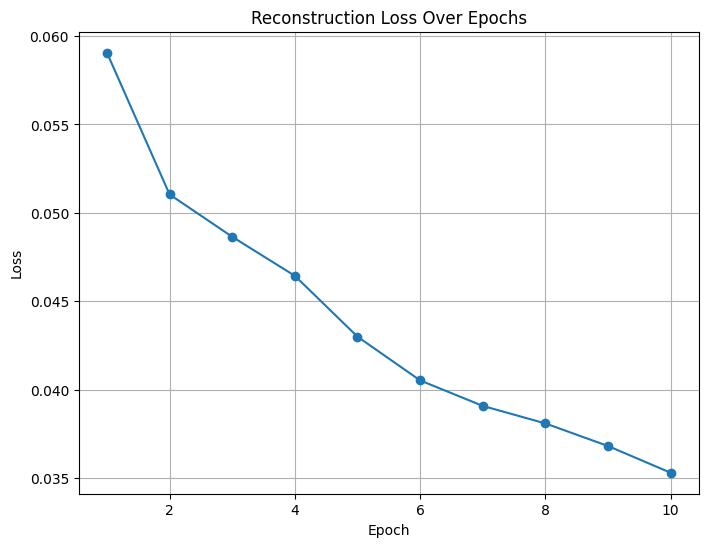

In [17]:
import torch.nn as nn
import torch.optim as optim

# 2. Autoencoder Implementation
class TimeSeriesAE(nn.Module):
    def __init__(self, input_size=9, hidden_size=64, encoding_dim=64):
        super().__init__()
        # Encoder
        self.encoder = nn.GRU(input_size, hidden_size, batch_first=True, bidirectional=True)
        self.enc_fc = nn.Linear(hidden_size * 2, encoding_dim)

        # Decoder
        self.dec_fc = nn.Linear(encoding_dim, hidden_size * 2)
        self.decoder = nn.GRU(hidden_size * 2, hidden_size, batch_first=True, bidirectional=True)
        self.output_layer = torch.nn.Linear(hidden_size * 2, input_size)

    def forward(self, x):
        _, hidden = self.encoder(x)
        hidden = torch.cat([hidden[-2], hidden[-1]], dim=1)  # Combine bidirectional
        encoded = self.enc_fc(hidden)

        # Decoding
        decoded = self.dec_fc(encoded).unsqueeze(1).repeat(1, x.size(1), 1)
        out, _ = self.decoder(decoded)
        reconstructed = self.output_layer(out)

        return reconstructed, encoded

# Instantiate the model
input_size = 9  # Number of features
hidden_size = 64

model = TimeSeriesAE(input_size, hidden_size)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Train loop for the autoencoder
loss_history = []
num_epochs = 10

for epoch in range(num_epochs):
    model.train()
    total_loss = 0
    for batch_X, _ in train_loader:
        optimizer.zero_grad()
        recon, _ = model(batch_X)
        loss = criterion(recon, batch_X)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    avg_loss = total_loss / len(train_loader)
    loss_history.append(avg_loss)
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {avg_loss:.4f}")

# Plotting the reconstruction loss vs epoch
plt.figure(figsize=(8, 6))
plt.plot(range(1, num_epochs + 1), loss_history, marker='o')
plt.title("Reconstruction Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()


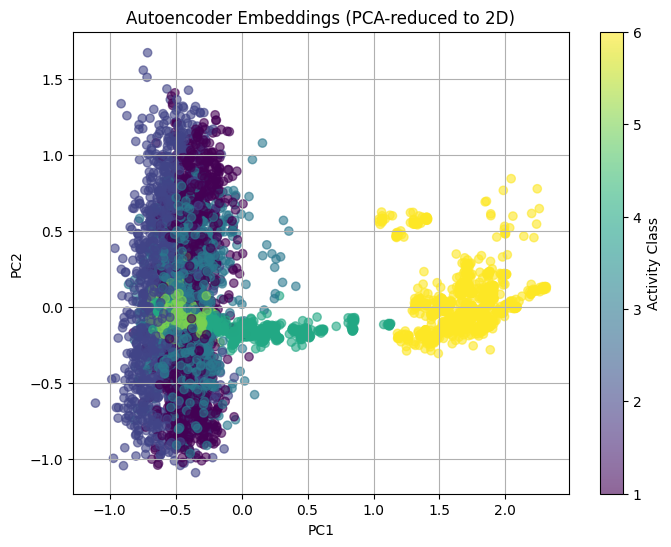

In [18]:
# 3. Embedding Extraction and Visualization

ae_loader = DataLoader(train_dataset, batch_size=32, shuffle=False)

# Extract embeddings for the training data
model.eval()
embeddings = []
train_labels = []
with torch.no_grad():
    for batch_X, labels in ae_loader:
        _, encoded = model(batch_X)
        embeddings.append(encoded.numpy())
        train_labels.extend(labels.numpy())

embeddings = np.concatenate(embeddings, axis=0)
train_labels = np.array(train_labels)

# Reduce embeddings to 2D using PCA for visualization
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
embeddings_2d = pca.fit_transform(embeddings)

# Create a scatter plot of the 2D embeddings
plt.figure(figsize=(8, 6))
activities = np.unique(train_labels)
scatter = plt.scatter(embeddings_2d[:, 0], embeddings_2d[:, 1], c=train_labels, cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Activity Class')
plt.title('Autoencoder Embeddings (PCA-reduced to 2D)')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()

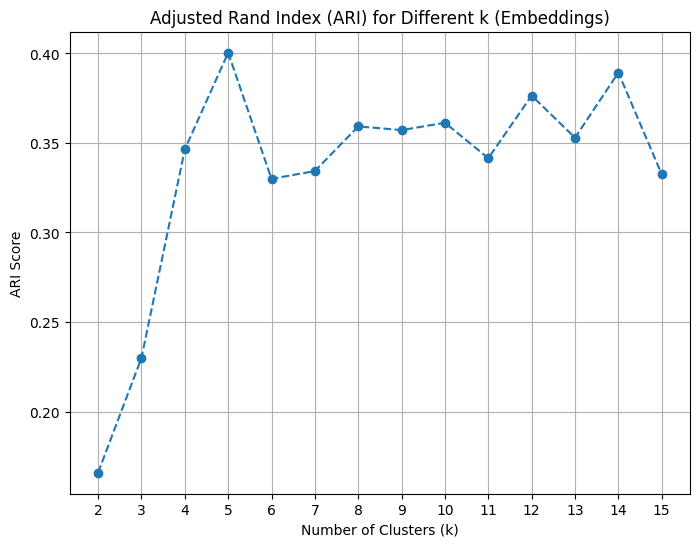

In [25]:
from sklearn.metrics import adjusted_rand_score

# Adjusted Rand Index (ARI) for the embeddings


ari_scores = []
for k in range(2, 16):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    clusters = kmeans.fit_predict(embeddings)  # Use embeddings for clustering
    ari = adjusted_rand_score(train_labels, clusters)  # Compare with ground truth labels
    ari_scores.append(ari)

# Plotting ARI Scores
plt.figure(figsize=(8, 6))
plt.plot(range(2, 16), ari_scores, marker='o', linestyle='--')
plt.title('Adjusted Rand Index (ARI) for Different k (Embeddings)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('ARI Score')
plt.xticks(range(2, 16))
plt.grid()
plt.show()


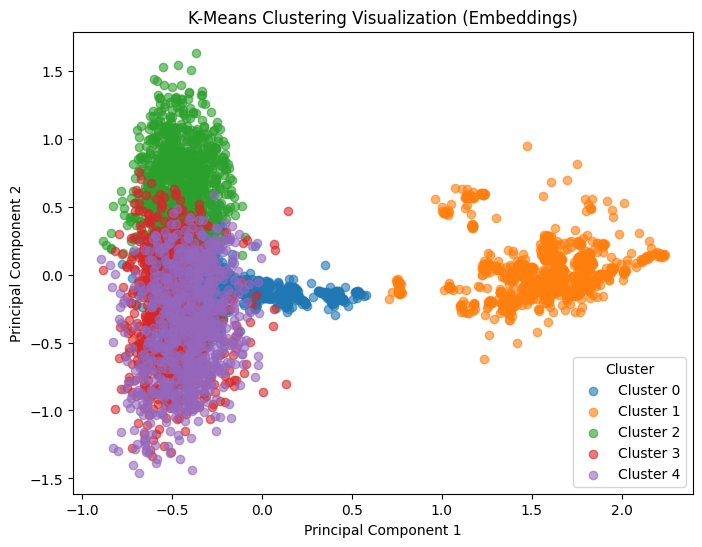

In [26]:
# Choose k based on ARI
best_embedd_ari_k = 5  # Based on ARI scores or other criteria
kmeans_ari = KMeans(n_clusters=best_embedd_ari_k, random_state=42, n_init=10)
clusters_ari = kmeans_ari.fit_predict(embeddings)  # Use embeddings for clustering

# PCA for visualization
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
X_train_pca_ari = pca.fit_transform(embeddings)

# Plotting the clusters
plt.figure(figsize=(8, 6))
for cluster in range(best_embedd_ari_k):
    indices = clusters_ari == cluster
    plt.scatter(X_train_pca_ari[indices, 0], X_train_pca_ari[indices, 1], label=f'Cluster {cluster}', alpha=0.6)

plt.title('K-Means Clustering Visualization (Embeddings)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()
